In [1]:
import torch

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import torch


from algorithms.gam import gam
from algorithms.lv_hba import lv_hba
from algorithms.blooc_cvxpy import blooc
from algorithms.salvf_cvxpy import salvf

from utils import *

In [3]:
# from google.colab import drive
# drive.mount('/content/drive')

In [4]:
plt.rcParams.update({'font.size': 18})
plt.rcParams['font.sans-serif']=['Arial']
plt.rcParams['axes.unicode_minus']=False

In [5]:
epochs = 120
seeds = 10

In [6]:
hparams = {
    'lv_hba': {
        'alpha': 0.01,
        'gama1': 0.1,
        'gama2': 0.1,
        'yita': 0.001
    },
    'gam': {
        'alpha': 0.05,
        'epsilon': 0.005
    },
    'blooc': {
        'gam': 12.,
        'eta': 0.01,
        'T': 20,
        'Ty': 20,
        'eta1g': 0.001,
        'eta1F': 0.00001,
        'eta2g': 0.0001,
        'eta2F': 0.0001
    },
    'salvf': {
        'c1': 5.,
        'c2': 0.1,
        'alpha':0.0035,
        'vr': False
    }
}

# Dataset Diabetes

In [7]:
dataset_name = "diabetes"
data = load_diabetes()

n_train = 500
n_val = 150

metrics_diabetes = {}
variables_diabetes = {}

algs = ['salvf','blooc', 'lv_hba', 'gam']
# algs = ['salvf']

for a in algs:
    metrics_diabetes[a] = []
    variables_diabetes[a] = []

In [8]:
algs = ['salvf']
for seed in range(seeds):

    print(f"Starting seed {seed+1}/{seeds}: ", end="")

    x_train, y_train, x_val, y_val, x_test, y_test = train_val_test_split(data, seed, n_train, n_val)

    for alg in algs:
        print(f"{alg}", end=" ")

        metrics_seed, variables_seed = eval(alg)(x_train, y_train, x_val, y_val, x_test, y_test, hparams[alg], epochs, verbose=True)
        metrics_diabetes[alg].append(metrics_seed)
        variables_diabetes[alg].append(variables_seed)
    print("DONE")

Starting seed 1/10: salvf Epoch [0/120]: val acc: 0.64 val loss: 1867.27 test acc: 0.69 test loss: 39.29
Epoch [20/120]: val acc: 0.68 val loss: 2.41 test acc: 0.73 test loss: 2.33
Epoch [40/120]: val acc: 0.68 val loss: 2.41 test acc: 0.73 test loss: 2.33
Epoch [60/120]: val acc: 0.68 val loss: 2.41 test acc: 0.73 test loss: 2.33
Epoch [80/120]: val acc: 0.68 val loss: 2.41 test acc: 0.73 test loss: 2.33
Epoch [100/120]: val acc: 0.68 val loss: 2.41 test acc: 0.73 test loss: 2.33
DONE
Starting seed 2/10: salvf Epoch [0/120]: val acc: 0.65 val loss: 604.32 test acc: 0.64 test loss: 4014.73
Epoch [20/120]: val acc: 0.71 val loss: 2.39 test acc: 0.68 test loss: 2.43
Epoch [40/120]: val acc: 0.71 val loss: 2.39 test acc: 0.68 test loss: 2.43
Epoch [60/120]: val acc: 0.71 val loss: 2.39 test acc: 0.68 test loss: 2.43
Epoch [80/120]: val acc: 0.71 val loss: 2.39 test acc: 0.68 test loss: 2.43
Epoch [100/120]: val acc: 0.71 val loss: 2.39 test acc: 0.68 test loss: 2.43
DONE
Starting seed 3/1

## Evaluation

In [9]:
results_path = "/Users/niehantao/Desktop/niehantao/tex/stochastic_constrained_bilevel/figs"

#f'../results/hyperparam_opt/{dataset_name}/'


In [10]:
metrics_lvhba = metrics_diabetes['lv_hba']
metrics_gam = metrics_diabetes['gam']
metrics_blooc = metrics_diabetes['blooc']
metrics_salvf = metrics_diabetes['salvf']

axis_iter = np.arange(epochs)

In [11]:


# Metrics for lvhba

# Metrics for gam


# Metrics for blooc


# Metrics for salvf


In [12]:
# Metrics for lvhba
if "lv_hba" in algs:
    axis_lvhba = np.array([[x['time_computation'] for x in metric] for metric in metrics_lvhba]).mean(0)
    train_acc_lvhba = np.array([[x['train_acc'] for x in metric] for metric in metrics_lvhba])
    val_acc_lvhba = np.array([[x['val_acc'] for x in metric] for metric in metrics_lvhba])
    test_acc_lvhba = np.array([[x['test_acc'] for x in metric] for metric in metrics_lvhba])

    val_loss_lvhba = np.array([[x['val_loss'] for x in metric] for metric in metrics_lvhba])[:, 0:]
    test_loss_lvhba = np.array([[x['test_loss'] for x in metric] for metric in metrics_lvhba])[:, 0:]
    lower_loss_lvhba = np.array([[x['loss_lower'] for x in metric] for metric in metrics_lvhba])[:, 1:]
    # constraint_violation_lvhba = np.array([[x['constraint_violation'] for x in metric] for metric in metrics_lvhba])[:, 1:]

# Metrics for gam
if "gam" in algs:
    axis_gam = np.array([[x['time_computation'] for x in metric] for metric in metrics_gam]).mean(0)
    train_acc_gam = np.array([[x['train_acc'] for x in metric] for metric in metrics_gam])
    val_acc_gam = np.array([[x['val_acc'] for x in metric] for metric in metrics_gam])
    test_acc_gam = np.array([[x['test_acc'] for x in metric] for metric in metrics_gam])
    val_loss_gam = np.array([[x['val_loss'] for x in metric] for metric in metrics_gam])[:, 0:]
    test_loss_gam = np.array([[x['test_loss'] for x in metric] for metric in metrics_gam])[:, 0:]
    lower_loss_gam = np.array([[x['loss_lower'] for x in metric] for metric in metrics_gam])[:, 1:]

# Metrics for blooc
if "blooc" in algs:
    axis_blooc = np.array([[x['time_computation'] for x in metric] for metric in metrics_blooc]).mean(0)
    train_acc_blooc = np.array([[x['train_acc_F'] for x in metric] for metric in metrics_blooc])
    val_acc_blooc = np.array([[x['val_acc_F'] for x in metric] for metric in metrics_blooc])
    test_acc_blooc = np.array([[x['test_acc_F'] for x in metric] for metric in metrics_blooc])
    val_loss_blooc = np.array([[x['val_loss_F'] for x in metric] for metric in metrics_blooc])[:, 0:]
    test_loss_blooc = np.array([[x['test_loss_F'] for x in metric] for metric in metrics_blooc])[:, 0:]
    lower_loss_blooc = np.array([[x['loss_lower'] for x in metric] for metric in metrics_blooc])[:, 1:]

# Metrics for salvf
if "salvf" in algs:
    axis_salvf = np.array([[x['time_computation'] for x in metric] for metric in metrics_salvf]).mean(0)
    train_acc_salvf = np.array([[x['train_acc_F'] for x in metric] for metric in metrics_blooc])  # Potential typo in source
    val_acc_salvf = np.array([[x['val_acc_F'] for x in metric] for metric in metrics_salvf])
    test_acc_salvf = np.array([[x['test_acc_F'] for x in metric] for metric in metrics_salvf])
    val_loss_salvf = np.array([[x['val_loss'] for x in metric] for metric in metrics_salvf])[:, 0:]
    test_loss_salvf = np.array([[x['test_loss'] for x in metric] for metric in metrics_salvf])[:, 0:]
    lower_loss_salvf = np.array([[x['loss_lower'] for x in metric] for metric in metrics_salvf])[:, 1:]
    # constraint_violation_salvf = np.array([[x['constraint_violation'] for x in metric] for metric in metrics_salvf])[:, 1:]

In [13]:
if len(algs) == 4:
    metrics_combined = {
        "lvhba": {
            "val_loss": val_loss_lvhba.tolist(),
            "test_loss": test_loss_lvhba.tolist(),
            "lower_loss": lower_loss_lvhba.tolist(),
            "train_acc": train_acc_lvhba.tolist(),
            "val_acc": val_acc_lvhba.tolist(),
            "test_acc": test_acc_lvhba.tolist(),
            "axis":axis_lvhba.tolist(),
        },
        "gam": {
            "val_loss": val_loss_gam.tolist(),
            "test_loss": test_loss_gam.tolist(),
            "lower_loss": lower_loss_gam.tolist(),
            "train_acc": train_acc_gam.tolist(),
            "val_acc": val_acc_gam.tolist(),
            "test_acc": test_acc_gam.tolist(),
            "axis":axis_gam.tolist(),
        },
        "blooc": {
            "val_loss": val_loss_blooc.tolist(),
            "test_loss": test_loss_blooc.tolist(),
            "lower_loss": lower_loss_blooc.tolist(),
            "train_acc": train_acc_blooc.tolist(),
            "val_acc": val_acc_blooc.tolist(),
            "test_acc": test_acc_blooc.tolist(),
            "axis":axis_blooc.tolist(),
        },
        "salvf": {
            "val_loss": val_loss_salvf.tolist(),
            "test_loss": test_loss_salvf.tolist(),
            "lower_loss": lower_loss_salvf.tolist(),
            "train_acc": train_acc_salvf.tolist(),
            "val_acc": val_acc_salvf.tolist(),
            "test_acc": test_acc_salvf.tolist(),
            "axis": axis_salvf.tolist(),
        },
    }



    # Flatten the data for CSV
    flat_data = []
    for method, metrics in metrics_combined.items():
        for metric_name, values in metrics.items():
            for i, row in enumerate(values):
                flat_data.append({"method": method, "metric": metric_name, "index": i, "values": row})

    # Convert to DataFrame and save as CSV
    df = pd.DataFrame(flat_data)
    df.to_csv("metrics_results_combined.csv", index=False)
    print("Metrics saved to 'metrics_results_combined.csv'")

In [14]:


# Load the CSV file
df = pd.read_csv("metrics_results_combined.csv")

# Convert the string representation of lists back to Python lists
df["values"] = df["values"].apply(eval)

# Initialize a dictionary for reconstructed variables
reconstructed_variables = {}

# Group by method and metric, and dynamically create variables
for (method, metric), group in df.groupby(["method", "metric"]):
    # Create variable name dynamically, e.g., "train_acc_lvhba"
    if method not in algs:
        variable_name = f"{metric}_{method}"
        # Sort by index to preserve order and convert to list
        reconstructed_variables[variable_name] = group.sort_values("index")["values"].tolist()
        reconstructed_variables[variable_name] = np.array(reconstructed_variables[variable_name])

# Dynamically assign each variable to the global namespace (optional)
globals().update(reconstructed_variables)


(0.0, 30.0)

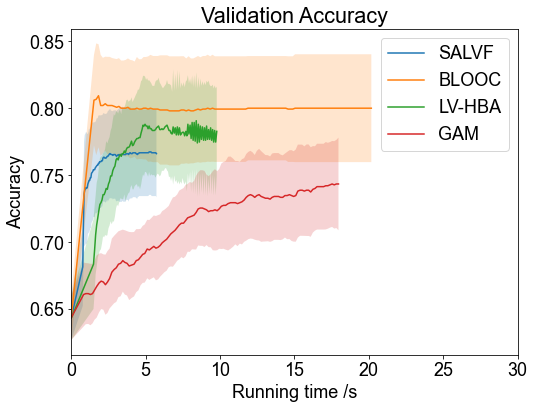

In [15]:
plt.figure(figsize=(8,6))

plt.plot(axis_salvf,val_acc_salvf.mean(0),'-',label="SALVF")
plt.fill_between(axis_salvf,val_acc_salvf.mean(0)-val_acc_salvf.std(0),val_acc_salvf.mean(0)+val_acc_salvf.std(0),alpha=0.2)

plt.plot(axis_blooc,val_acc_blooc.mean(0),'-',label="BLOOC")
plt.fill_between(axis_blooc,val_acc_blooc.mean(0)-val_acc_blooc.std(0),val_acc_blooc.mean(0)+val_acc_blooc.std(0),alpha=0.2)

plt.plot(axis_lvhba,val_acc_lvhba.mean(0),'-',label="LV-HBA")
plt.fill_between(axis_lvhba,val_acc_lvhba.mean(0)-val_acc_lvhba.std(0),val_acc_lvhba.mean(0)+val_acc_lvhba.std(0),alpha=0.2)

plt.plot(axis_gam,val_acc_gam.mean(0),'-',label="GAM")
plt.fill_between(axis_gam,val_acc_gam.mean(0)-val_acc_gam.std(0),val_acc_gam.mean(0)+val_acc_gam.std(0),alpha=0.2)


plt.legend()
plt.title('Validation Accuracy')
plt.xlabel('Running time /s')
plt.ylabel("Accuracy")
plt.xlim([0, 30])
# plt.savefig(results_path + '/SVM_val_acc_vs_time.pdf', bbox_inches="tight")

Text(0, 0.5, 'Accuracy')

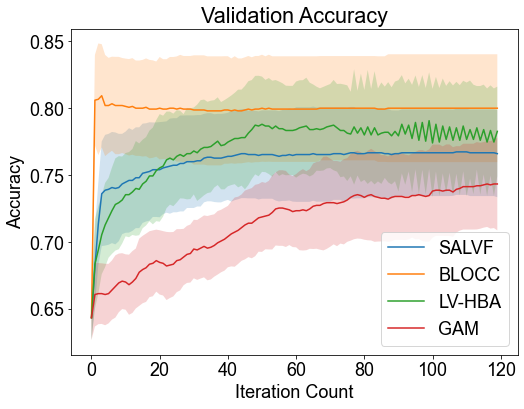

In [16]:
plt.figure(figsize=(8,6))

iter_axis = np.arange(val_acc_gam.shape[1])

plt.plot(axis_iter,val_acc_salvf.mean(0),'-',label="SALVF")
plt.fill_between(axis_iter,val_acc_salvf.mean(0)-val_acc_salvf.std(0),val_acc_salvf.mean(0)+val_acc_salvf.std(0),alpha=0.2)

plt.plot(axis_iter,val_acc_blooc.mean(0),'-',label="BLOCC")
plt.fill_between(axis_iter,val_acc_blooc.mean(0)-val_acc_blooc.std(0),val_acc_blooc.mean(0)+val_acc_blooc.std(0),alpha=0.2)

plt.plot(axis_iter,val_acc_lvhba.mean(0),'-',label="LV-HBA")
plt.fill_between(axis_iter,val_acc_lvhba.mean(0)-val_acc_lvhba.std(0),val_acc_lvhba.mean(0)+val_acc_lvhba.std(0),alpha=0.2)

plt.plot(axis_iter,val_acc_gam.mean(0),'-',label="GAM")
plt.fill_between(axis_iter,val_acc_gam.mean(0)-val_acc_gam.std(0),val_acc_gam.mean(0)+val_acc_gam.std(0),alpha=0.2)

plt.legend()
plt.title('Validation Accuracy')
plt.xlabel('Iteration Count')
plt.ylabel("Accuracy")


# plt.savefig(results_path + 'val_accuracy_iteration.pdf', bbox_inches="tight")

In [17]:
# plt.figure(figsize=(8,6))

# plt.plot(axis_salvf,test_acc_salvf.mean(0),'-',label="SALVF")
# plt.fill_between(axis_salvf,test_acc_salvf.mean(0)-test_acc_salvf.std(0),test_acc_salvf.mean(0)+test_acc_salvf.std(0),alpha=0.2)

# plt.plot(axis_blooc,test_acc_blooc.mean(0),'-',label="BLOCC")
# plt.fill_between(axis_blooc,test_acc_blooc.mean(0)-test_acc_blooc.std(0),test_acc_blooc.mean(0)+test_acc_blooc.std(0),alpha=0.2)

# plt.plot(axis_lvhba,test_acc_lvhba.mean(0),'-',label="LV-HBA")
# plt.fill_between(axis_lvhba,test_acc_lvhba.mean(0)-test_acc_lvhba.std(0),test_acc_lvhba.mean(0)+test_acc_lvhba.std(0),alpha=0.2)

# plt.plot(axis_gam,test_acc_gam.mean(0),'-',label="GAM")
# plt.fill_between(axis_gam,test_acc_gam.mean(0)-test_acc_gam.std(0),test_acc_gam.mean(0)+test_acc_gam.std(0),alpha=0.2)

# plt.legend()
# plt.title('Test Accuracy')
# plt.xlabel('Running time /s')
# plt.ylabel("Accuracy")

# plt.xlim([0,axis_lvhba.max()])
# plt.savefig(results_path + 'test_accuracy_running_time.pdf', bbox_inches="tight")

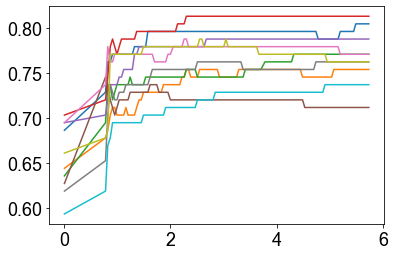

In [18]:
for i in range(10):
    plt.plot(axis_salvf,test_acc_salvf[i],'-',label="SALVF")

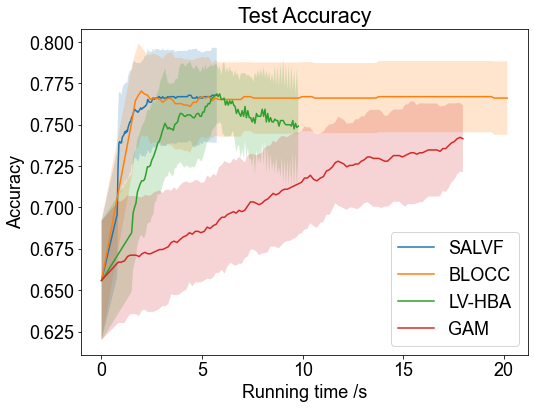

In [19]:
plt.figure(figsize=(8,6))

plt.plot(axis_salvf,test_acc_salvf.mean(0),'-',label="SALVF")
plt.fill_between(axis_salvf,test_acc_salvf.mean(0)-test_acc_salvf.std(0),test_acc_salvf.mean(0)+test_acc_salvf.std(0),alpha=0.2)

plt.plot(axis_blooc,test_acc_blooc.mean(0),'-',label="BLOCC")
plt.fill_between(axis_blooc,test_acc_blooc.mean(0)-test_acc_blooc.std(0),test_acc_blooc.mean(0)+test_acc_blooc.std(0),alpha=0.2)

plt.plot(axis_lvhba,test_acc_lvhba.mean(0),'-',label="LV-HBA")
plt.fill_between(axis_lvhba,test_acc_lvhba.mean(0)-test_acc_lvhba.std(0),test_acc_lvhba.mean(0)+test_acc_lvhba.std(0),alpha=0.2)

plt.plot(axis_gam,test_acc_gam.mean(0),'-',label="GAM")
plt.fill_between(axis_gam,test_acc_gam.mean(0)-test_acc_gam.std(0),test_acc_gam.mean(0)+test_acc_gam.std(0),alpha=0.2)

plt.legend()
plt.title('Test Accuracy')
plt.xlabel('Running time /s')
plt.ylabel("Accuracy")


plt.savefig(results_path + '/SVM_test_acc_vs_time.pdf', bbox_inches="tight")

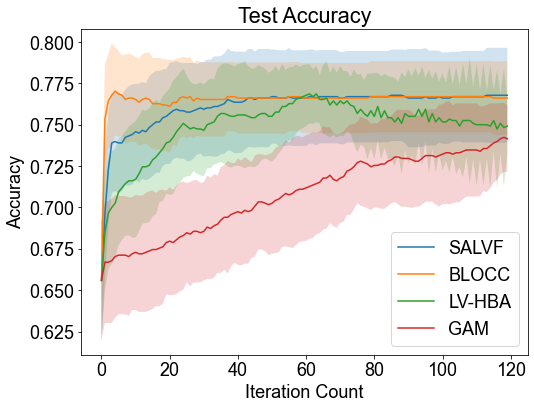

In [20]:
plt.figure(figsize=(8,6))

plt.plot(axis_iter,test_acc_salvf.mean(0),'-',label="SALVF")
plt.fill_between(axis_iter,test_acc_salvf.mean(0)-test_acc_salvf.std(0),test_acc_salvf.mean(0)+test_acc_salvf.std(0),alpha=0.2)

plt.plot(axis_iter,test_acc_blooc.mean(0),'-',label="BLOCC")
plt.fill_between(axis_iter,test_acc_blooc.mean(0)-test_acc_blooc.std(0),test_acc_blooc.mean(0)+test_acc_blooc.std(0),alpha=0.2)

plt.plot(axis_iter,test_acc_lvhba.mean(0),'-',label="LV-HBA")
plt.fill_between(axis_iter,test_acc_lvhba.mean(0)-test_acc_lvhba.std(0),test_acc_lvhba.mean(0)+test_acc_lvhba.std(0),alpha=0.2)

plt.plot(axis_iter,test_acc_gam.mean(0),'-',label="GAM")
plt.fill_between(axis_iter,test_acc_gam.mean(0)-test_acc_gam.std(0),test_acc_gam.mean(0)+test_acc_gam.std(0),alpha=0.2)

plt.legend()
plt.title('Test Accuracy')
plt.xlabel('Iteration Count')
plt.ylabel("Accuracy")
plt.savefig(results_path + '/SVM_test_acc_vs_iter.pdf', bbox_inches="tight")

(1.5, 3.4)

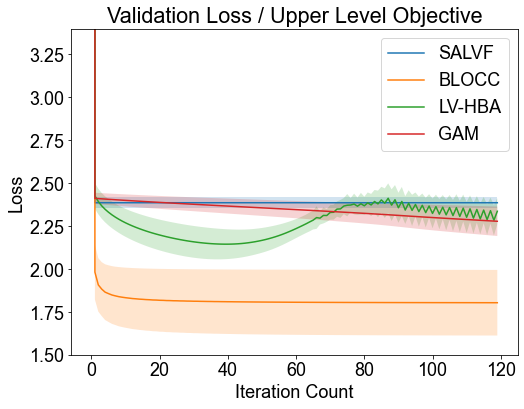

In [21]:
plt.figure(figsize=(8,6))

plt.plot(iter_axis,val_loss_salvf.mean(0),'-',label="SALVF")
fill_dn_salvf = val_loss_salvf.mean(0)-val_loss_salvf.std(0)
fill_up_salvf = val_loss_salvf.mean(0)+val_loss_salvf.std(0)
plt.fill_between(iter_axis[1:],fill_dn_salvf[1:],fill_up_salvf[1:],alpha=0.2)


plt.plot(iter_axis,val_loss_blooc.mean(0),'-',label="BLOCC")
fill_dn_blooc = val_loss_blooc.mean(0)-val_loss_blooc.std(0)
fill_up_blooc = val_loss_blooc.mean(0)+val_loss_blooc.std(0)
plt.fill_between(iter_axis[1:],fill_dn_blooc[1:],fill_up_blooc[1:],alpha=0.2)

plt.plot(iter_axis,val_loss_lvhba.mean(0),'-',label="LV-HBA")
fill_dn_LV = val_loss_lvhba.mean(0)-val_loss_lvhba.std(0)
fill_up_LV = val_loss_lvhba.mean(0)+val_loss_lvhba.std(0)
plt.fill_between(iter_axis[1:],fill_dn_LV[1:],fill_up_LV[1:],alpha=0.2)

plt.plot(iter_axis,val_loss_gam.mean(0),'-',label="GAM")
fill_up_GAM = val_loss_gam.mean(0)-val_loss_gam.std(0)
fill_dn_GAM = val_loss_gam.mean(0)+val_loss_gam.std(0)
plt.fill_between(iter_axis[1:],fill_dn_GAM[1:],fill_up_GAM[1:],alpha=0.2)

plt.legend()
plt.title('Validation Loss / Upper Level Objective')
plt.xlabel('Iteration Count')
plt.ylabel("Loss")

plt.ylim([1.5,3.4])
# plt.savefig(results_path + 'upper_obj_iteration.pdf', bbox_inches="tight")

(0.0, 13.0)

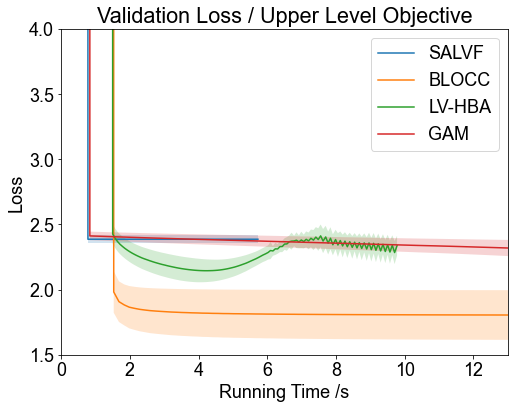

In [22]:
plt.figure(figsize=(8,6))

plt.plot(axis_salvf,val_loss_salvf.mean(0),'-',label="SALVF")
fill_dn_salvf = val_loss_salvf.mean(0)-val_loss_salvf.std(0)
fill_up_salvf = val_loss_salvf.mean(0)+val_loss_salvf.std(0)
plt.fill_between(axis_salvf[1:],fill_dn_salvf[1:],fill_up_salvf[1:],alpha=0.2)


plt.plot(axis_blooc,val_loss_blooc.mean(0),'-',label="BLOCC")
fill_dn_blooc = val_loss_blooc.mean(0)-val_loss_blooc.std(0)
fill_up_blooc = val_loss_blooc.mean(0)+val_loss_blooc.std(0)
plt.fill_between(axis_blooc[1:],fill_dn_blooc[1:],fill_up_blooc[1:],alpha=0.2)

plt.plot(axis_lvhba,val_loss_lvhba.mean(0),'-',label="LV-HBA")
fill_dn_LV = val_loss_lvhba.mean(0)-val_loss_lvhba.std(0)
fill_up_LV = val_loss_lvhba.mean(0)+val_loss_lvhba.std(0)
plt.fill_between(axis_lvhba[1:],fill_dn_LV[1:],fill_up_LV[1:],alpha=0.2)

plt.plot(axis_gam,val_loss_gam.mean(0),'-',label="GAM")
fill_up_GAM = val_loss_gam.mean(0)-val_loss_gam.std(0)
fill_dn_GAM = val_loss_gam.mean(0)+val_loss_gam.std(0)
plt.fill_between(axis_gam[1:],fill_dn_GAM[1:],fill_up_GAM[1:],alpha=0.2)

plt.legend()
plt.title('Validation Loss / Upper Level Objective')
plt.xlabel('Running Time /s')
plt.ylabel("Loss")

plt.ylim([1.5,4])
plt.xlim([0,13])
# plt.savefig(results_path + 'upper_obj_time.pdf', bbox_inches="tight")

(1.5, 3.4)

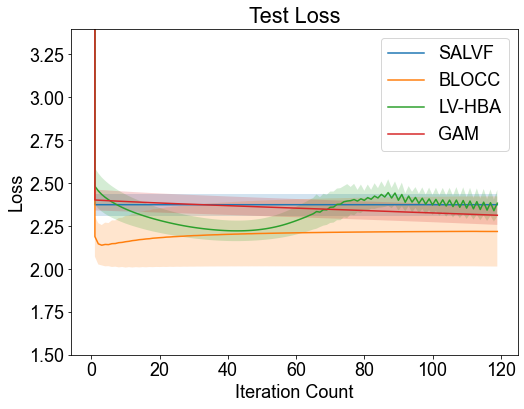

In [23]:
plt.figure(figsize=(8,6))

plt.plot(iter_axis,test_loss_salvf.mean(0),'-',label="SALVF")
fill_dn_salvf = test_loss_salvf.mean(0)-test_loss_salvf.std(0)
fill_up_salvf = test_loss_salvf.mean(0)+test_loss_salvf.std(0)
plt.fill_between(iter_axis[1:],fill_dn_salvf[1:],fill_up_salvf[1:],alpha=0.2)

plt.plot(iter_axis,test_loss_blooc.mean(0),'-',label="BLOCC")
fill_dn_blooc = test_loss_blooc.mean(0)-test_loss_blooc.std(0)
fill_up_blooc = test_loss_blooc.mean(0)+test_loss_blooc.std(0)
plt.fill_between(iter_axis[1:],fill_dn_blooc[1:],fill_up_blooc[1:],alpha=0.2)

plt.plot(iter_axis,test_loss_lvhba.mean(0),'-',label="LV-HBA")
fill_dn_LV = test_loss_lvhba.mean(0)-test_loss_lvhba.std(0)
fill_up_LV = test_loss_lvhba.mean(0)+test_loss_lvhba.std(0)
plt.fill_between(iter_axis[1:],fill_dn_LV[1:],fill_up_LV[1:],alpha=0.2)

plt.plot(iter_axis,test_loss_gam.mean(0),'-',label="GAM")
fill_up_GAM = test_loss_gam.mean(0)-test_loss_gam.std(0)
fill_dn_GAM = test_loss_gam.mean(0)+test_loss_gam.std(0)
plt.fill_between(iter_axis[1:],fill_dn_GAM[1:],fill_up_GAM[1:],alpha=0.2)

plt.legend()
plt.title('Test Loss')
plt.xlabel('Iteration Count')
plt.ylabel("Loss")

plt.ylim([1.5,3.4])
# plt.savefig(results_path + 'test_obj_iteration.pdf', bbox_inches="tight")

In [24]:
print(lower_loss_salvf.dtype)

object


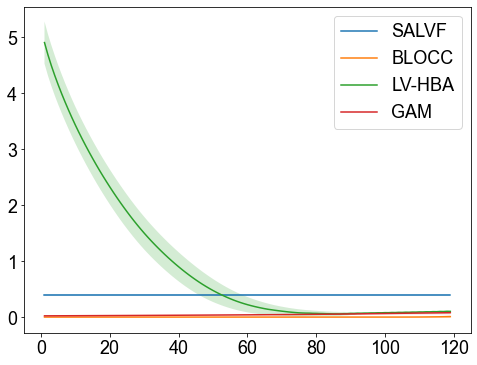

In [25]:
plt.figure(figsize=(8,6))
lower_loss_salvf = np.array(lower_loss_salvf, dtype=np.float64)
plt.plot(iter_axis[1:],lower_loss_salvf.mean(0),'-',label="SALVF")
fill_dn_salvf = lower_loss_salvf.mean(0)-lower_loss_salvf.std(0)
fill_up_salvf = lower_loss_salvf.mean(0)+lower_loss_salvf.std(0)
plt.fill_between(iter_axis[1:],fill_dn_salvf,fill_up_salvf,alpha=0.2)

plt.plot(iter_axis[1:],lower_loss_blooc.mean(0),'-',label="BLOCC")
fill_dn_blooc = lower_loss_blooc.mean(0)-lower_loss_blooc.std(0)
fill_up_blooc = lower_loss_blooc.mean(0)+lower_loss_blooc.std(0)
plt.fill_between(iter_axis[1:],fill_dn_blooc,fill_up_blooc,alpha=0.2)

plt.plot(iter_axis[1:],lower_loss_lvhba.mean(0),'-',label="LV-HBA")
fill_dn_LV = lower_loss_lvhba.mean(0)-lower_loss_lvhba.std(0)
fill_up_LV = lower_loss_lvhba.mean(0)+lower_loss_lvhba.std(0)
plt.fill_between(iter_axis[1:],fill_dn_LV,fill_up_LV,alpha=0.2)

plt.plot(iter_axis[1:],lower_loss_gam.mean(0),'-',label="GAM")
fill_up_GAM = lower_loss_gam.mean(0)-lower_loss_gam.std(0)
fill_dn_GAM = lower_loss_gam.mean(0)+lower_loss_gam.std(0)
plt.fill_between(iter_axis[1:],fill_dn_GAM,fill_up_GAM,alpha=0.2)

plt.legend()
# plt.title('Lower Loss')
# plt.xlabel('Iteration Count')
# plt.ylabel("Loss")
# plt.savefig(results_path + 'lower_obj_iteration.pdf', bbox_inches="tight")

In [26]:
# plt.figure(figsize=(8,6))

# plt.plot(iter_axis[1:],constraint_violation_ours.mean(0),'-',label="BLOCC")
# # fill_dn_ours = constraint_violation_ours.mean(0)-constraint_violation_ours.std(0)
# # fill_up_ours = constraint_violation_ours.mean(0)+constraint_violation_ours.std(0)
# # plt.fill_between(iter_axis[1:],fill_dn_ours,fill_up_ours,alpha=0.2)

# plt.plot(iter_axis[1:],constraint_violation_lvhba.mean(0),'-',label="LV-HBA")
# # fill_dn_LV = constraint_violation_lvhba.mean(0)-constraint_violation_lvhba.std(0)
# # fill_up_LV = constraint_violation_lvhba.mean(0)+constraint_violation_lvhba.std(0)
# # plt.fill_between(iter_axis[1:],fill_dn_LV,fill_up_LV,alpha=0.2)

# plt.legend()
# # plt.title('Lower Loss')
# # plt.xlabel('Iteration Count')
# # plt.ylabel("Loss")

# plt.savefig(results_path+'constraint_violation.pdf', bbox_inches="tight")

# Gamma Sensitivity Analysis

In [27]:
[len(metrics['diabetes']['gam'][i]) for i in range(4)]

NameError: name 'metrics' is not defined

In [ ]:
[len(metrics['diabetes']['ours'][i]) for i in range(10)], [len(metrics['diabetes']['lv_hba'][i]) for i in range(10)], [len(metrics['diabetes']['gam'][i]) for i in range(10)]

In [ ]:
np.mean([metrics['diabetes']['ours'][i][-1]['time_computation'] for i in range(10)]), np.mean([metrics['diabetes']['lv_hba'][i][-1]['time_computation'] for i in range(10)]),np.mean([metrics['diabetes']['gam'][i][-1]['time_computation'] for i in range(10)])

In [ ]:
np.mean([metrics['diabetes']['ours'][i][-1]['test_acc_F'] for i in range(10)]), np.mean([metrics['diabetes']['lv_hba'][i][-1]['test_acc'] for i in range(10)]),np.mean([metrics['diabetes']['gam'][i][-1]['test_acc'] for i in range(10)])